## 📊 Customer Churn Predictive Modeling


### 3 Predictive Modeling and Analysis

In this phase, we used the engineered customer dataset to develop a machine learning model for predicting customer churn. The steps involved preparing the data, selecting appropriate features, training a classification model, and evaluating its performance.


### 3.1 Data Preparation and Feature Selection

The dataset used for modeling is the `featured_customers.csv`, which includes customer-level metrics:

- **purchase_frequency**: Number of purchases per customer.
- **days_since_last_purchase**: Days since the customer last made a purchase.
- **churn**: Binary target variable (1 = churned, 0 = active).

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [44]:
# Load the dataset
file_path = "C:/DataCapstone/customer-behavior-ecommerce/data/Processed/featured_customers.csv"
df = pd.read_csv(file_path)
print(df.head)

# Select features and target
features = ['purchase_frequency', 'days_since_last_purchase']
X = df[features]
y = df['churn']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<bound method NDFrame.head of         customer_id      purchase_date_x product_category  product_price  \
0             46251  2020-09-08 09:38:32      Electronics             12   
1             46251  2022-03-05 12:56:35             Home            468   
2             46251  2022-05-23 18:18:01             Home            288   
3             46251  2020-11-12 13:13:29         Clothing            196   
4             13593  2020-11-27 17:55:11             Home            449   
...             ...                  ...              ...            ...   
249995        33308  2023-08-10 13:39:06         Clothing            279   
249996        48835  2021-11-23 01:30:42             Home             27   
249997        21019  2020-07-02 14:04:48             Home             17   
249998        49234  2020-12-30 02:02:40            Books            398   
249999        16971  2021-03-13 16:28:35      Electronics            425   

        quantity  total_purchase_amount payment_method  c

### 3.2 Model Selection and Training
Two classification models were selected for comparison:

- **Logistic Regression**: A baseline model for binary classification.
- **Random Forest Classifier**: An ensemble method to capture nonlinear relationships.

The data was split into 80% training and 20% testing sets.

In [45]:
# Define Logistic Regression pipeline
log_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])
log_pipeline.fit(X_train, y_train)

# Define Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

### 3.3 Evaluation and Visualization
Model performance was evaluated using classification metrics:
- Accuracy
- Precision
- Recall
- F1 Score

Confusion matrix visualizations were also generated.

c:\DataCapstone\customer-behavior-ecommerce\churn_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\DataCapstone\customer-behavior-ecommerce\churn_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\DataCapstone\customer-behavior-ecommerce\churn_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     40016
           1       0.00      0.00      0.00      9984

    accuracy                           0.80     50000
   macro avg       0.40      0.50      0.44     50000
weighted avg       0.64      0.80      0.71     50000

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     40016
           1       0.57      0.11      0.19      9984

    accuracy                           0.81     50000
   macro avg       0.70      0.55      0.54     50000
weighted avg       0.77      0.81      0.75     50000



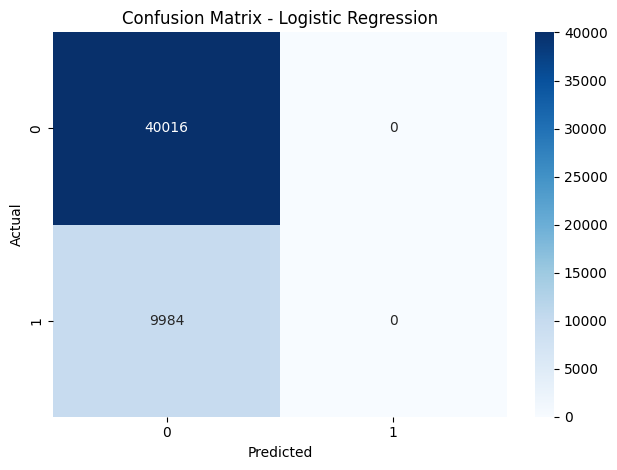

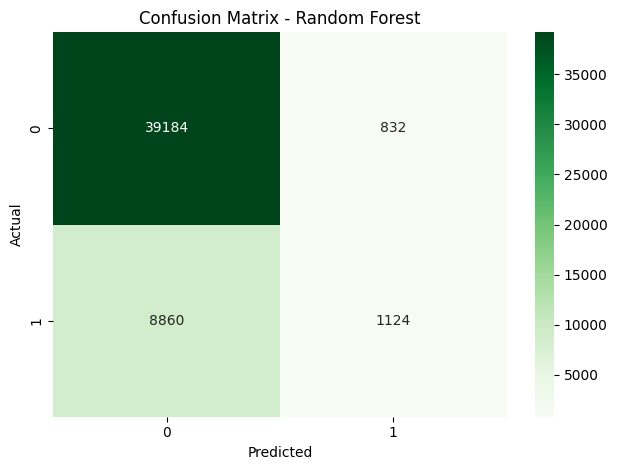

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Predictions
log_pred = log_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)

# Classification Reports
print("Logistic Regression:\n", classification_report(y_test, log_pred))
print("Random Forest Classifier:\n", classification_report(y_test, rf_pred))

# Confusion Matrix for Logistic Regression
log_cm = confusion_matrix(y_test, log_pred)
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("C:/DataCapstone/customer-behavior-ecommerce/reports/confusion_matrix_logistic.png")
plt.show()

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("C:/DataCapstone/customer-behavior-ecommerce/reports/confusion_matrix_rf.png")
plt.show()

### Confusion Matrix Visualization

### Feature Importance Visualization

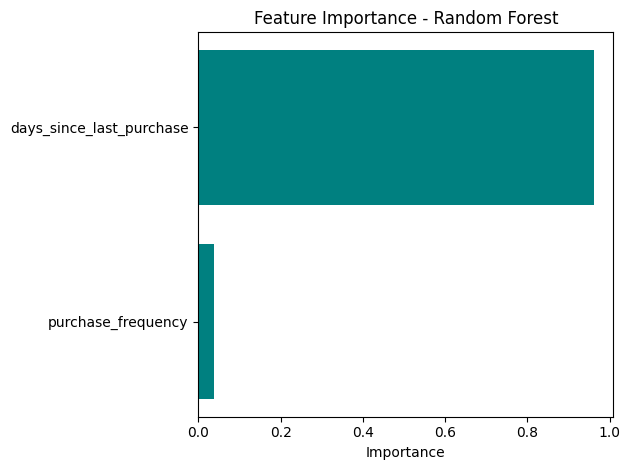

In [58]:
import numpy as np
rf_model = rf_pipeline.named_steps['model']
importances = rf_model.feature_importances_

plt.barh(features, importances, color='teal')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig("C:/DataCapstone/customer-behavior-ecommerce/reports/feature_importance.png")
plt.show()

In [61]:
### Results Export
results_df = pd.DataFrame(X_test, columns=features)
results_df['actual'] = y_test.reset_index(drop=True)
results_df['logistic_pred'] = y_pred
results_df['rf_pred'] = y_pred_rf
results_df.to_csv("C:/DataCapstone/customer-behavior-ecommerce/data/Processed/model_results.csv", index=False)

# Save models
joblib.dump(rf_pipeline, "C:/DataCapstone/customer-behavior-ecommerce/data/Processed/logistic_pipeline.pkl")
joblib.dump(rf_pipeline, "C:/DataCapstone/customer-behavior-ecommerce/data/Processed/rf_pipeline.pkl")

['C:/DataCapstone/customer-behavior-ecommerce/data/Processed/rf_pipeline.pkl']

### Model Limitations:

- Limitations include the exclusion of features like customer demographics or payment methods which could further improve predictive power.
- Future enhancements could involve hyperparameter tuning or using cross-validation techniques to optimize model performance.